## 1. Imports & Paths

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

from shap_utils import run_shap_analysis

e:\AI Trading Signal Prediction\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 2. Load data

In [2]:
from pathlib import Path
import pandas as pd

PROJECT_ROOT = Path.cwd().parent

DATA_DIR = PROJECT_ROOT / "data" / "processed"
MODELS_DIR = PROJECT_ROOT / "models"
REPORTS_DIR = PROJECT_ROOT / "reports"
REPORTS_DIR.mkdir(exist_ok=True)


## 3. SHAP for Target model

In [3]:
# -------------------------------
# Target Hit SHAP
# -------------------------------
df_test = pd.read_csv(DATA_DIR / "splits_target_hit" / "test.csv")

exclude_cols = [
    "id", "status", "created_at", "target_type",
    "hit_first", "coin", "TP1",
    "target_hit", "stop_hit"
]

feature_cols = [c for c in df_test.columns if c not in exclude_cols]
X_test = df_test[feature_cols]

In [5]:
target_importance, target_shap_values, target_sample = run_shap_analysis(
    model_path=MODELS_DIR / "model_target_hit_final_calibrated.pkl",
    X=X_test,
    feature_cols=feature_cols,
    model_name="target_hit",
    reports_dir=REPORTS_DIR
)

display(target_importance.head(10))


wick_ratio          0.038216
ratio_high_low      0.021656
upper_wick          0.019402
ratio_close_high    0.017493
volume              0.014569
candle_body         0.011549
close               0.009380
candle_range        0.006867
dtype: float64

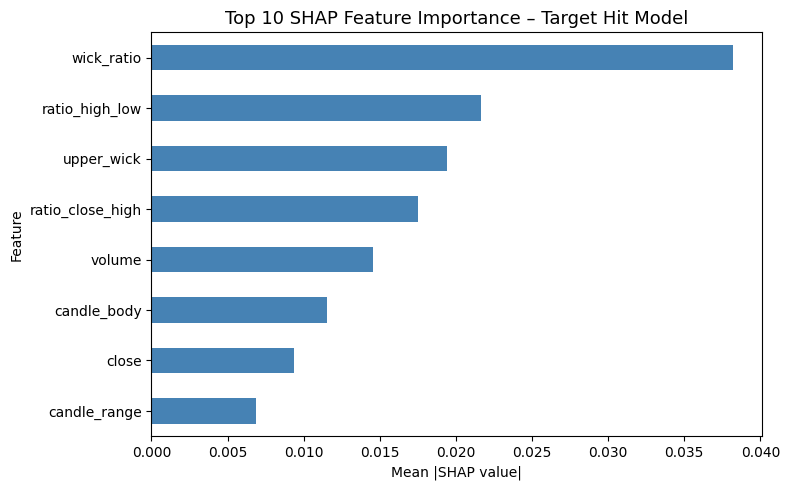

In [12]:
import matplotlib.pyplot as plt

# Top 10 features
target_top10 = target_importance.head(10)

plt.figure(figsize=(8, 5))
target_top10[::-1].plot(
    kind="barh",
    color="steelblue"
)

plt.title("Top 10 SHAP Feature Importance – Target Hit Model", fontsize=13)
plt.xlabel("Mean |SHAP value|")
plt.ylabel("Feature")
plt.tight_layout()

plt.savefig(
    REPORTS_DIR / "shap_bar_target_hit.png",
    dpi=300
)
plt.show()

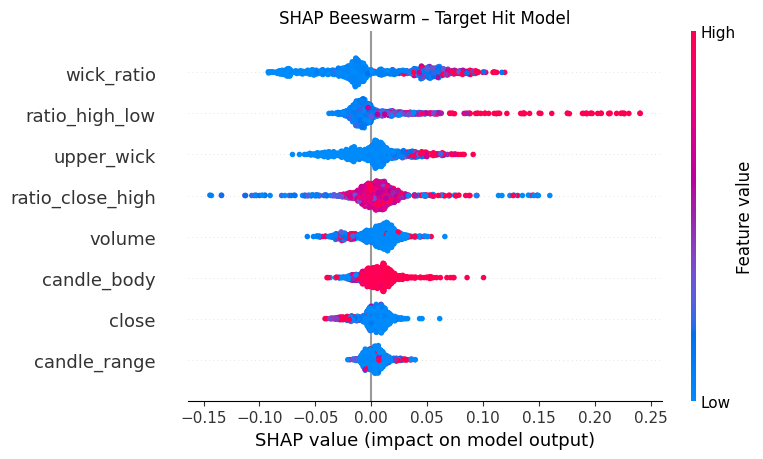

In [13]:
import shap
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
shap.summary_plot(
    target_shap_values,
    target_sample,
    feature_names=feature_cols,
    show=False
)
plt.title("SHAP Beeswarm – Target Hit Model")
plt.tight_layout()
plt.savefig(REPORTS_DIR / "shap_beeswarm_target_hit.png", dpi=300)
plt.show()


## 4. SHAP for Stop model

In [ ]:
# -------------------------------
# Stop Hit SHAP
# -------------------------------
df_test = pd.read_csv(DATA_DIR / "splits_stop_hit" / "test.csv")

exclude_cols = [
    "id", "status", "created_at", "target_type",
    "hit_first", "coin", "TP1",
    "target_hit", "stop_hit"
]

feature_cols = [c for c in df_test.columns if c not in exclude_cols]
X_test = df_test[feature_cols]

In [9]:
stop_importance, stop_shap_values, stop_sample = run_shap_analysis(
    model_path=MODELS_DIR / "model_stop_hit_final_calibrated.pkl",
    X=X_test,
    feature_cols=feature_cols,
    model_name="stop_hit",
    reports_dir=REPORTS_DIR
)

display(target_importance.head(10))


e:\AI Trading Signal Prediction\.venv\Lib\site-packages\sklearn\base.py:463: InconsistentVersionWarning: Trying to unpickle estimator IsotonicRegression from version 1.7.2 when using version 1.8.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


wick_ratio          0.038216
ratio_high_low      0.021656
upper_wick          0.019402
ratio_close_high    0.017493
volume              0.014569
candle_body         0.011549
close               0.009380
candle_range        0.006867
dtype: float64

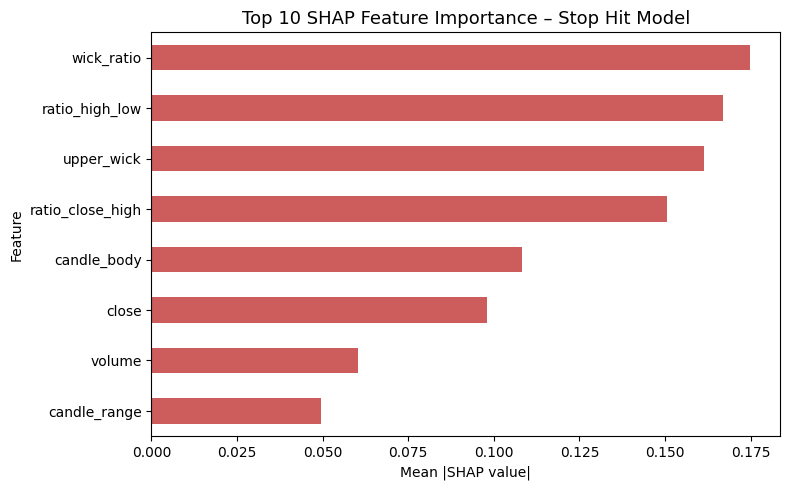

In [15]:
# Top 10 features
stop_top10 = stop_importance.head(10)

plt.figure(figsize=(8, 5))
stop_top10[::-1].plot(
    kind="barh",
    color="indianred"
)

plt.title("Top 10 SHAP Feature Importance – Stop Hit Model", fontsize=13)
plt.xlabel("Mean |SHAP value|")
plt.ylabel("Feature")
plt.tight_layout()

plt.savefig(
    REPORTS_DIR / "shap_bar_stop_hit.png",
    dpi=300
)
plt.show()


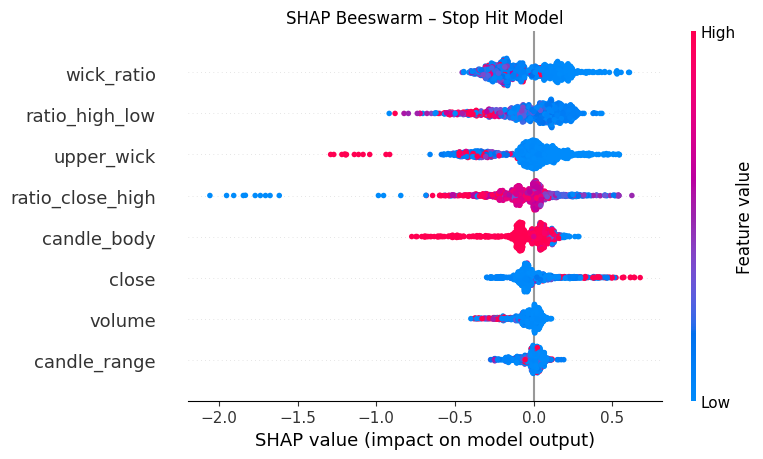

In [14]:
plt.figure(figsize=(10, 8))
shap.summary_plot(
    stop_shap_values,
    stop_sample,
    feature_names=feature_cols,
    show=False
)
plt.title("SHAP Beeswarm – Stop Hit Model")
plt.tight_layout()
plt.savefig(REPORTS_DIR / "shap_beeswarm_stop_hit.png", dpi=300)
plt.show()

## 5. Comparison table

In [16]:
comparison_df = pd.DataFrame({
    "target_importance": target_importance,
    "stop_importance": stop_importance
}).fillna(0)

comparison_df["difference"] = (
    comparison_df["stop_importance"]
    - comparison_df["target_importance"]
)

comparison_df = comparison_df.sort_values(
    by="difference",
    ascending=False
)

comparison_df


,target_importance,stop_importance,difference
ratio_high_low,0.021656,0.166992,0.145336
upper_wick,0.019402,0.161519,0.142116
wick_ratio,0.038216,0.174845,0.136629
ratio_close_high,0.017493,0.150647,0.133155
candle_body,0.011549,0.108310,0.096761
close,0.009380,0.097947,0.088567
volume,0.014569,0.060344,0.045775
candle_range,0.006867,0.049500,0.042633


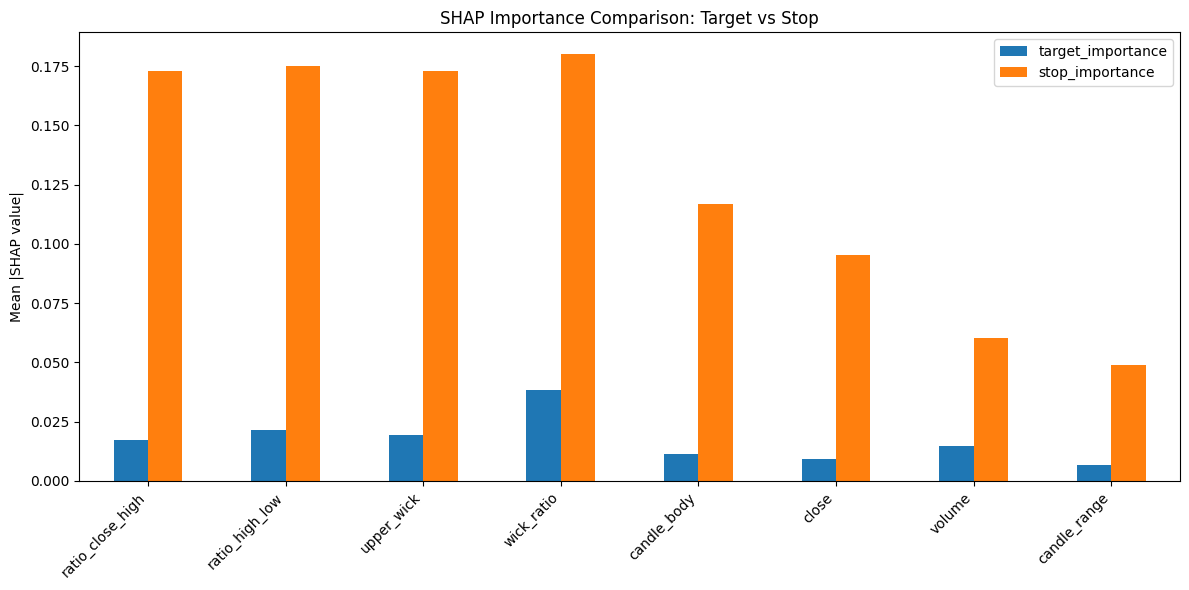

In [19]:
comparison_df[["target_importance", "stop_importance"]].head(10).plot(
    kind="bar",
    figsize=(12, 6)
)

plt.title("SHAP Importance Comparison: Target vs Stop")
plt.ylabel("Mean |SHAP value|")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## SHAP Interpretation

The SHAP analysis highlights a clear behavioral difference between the
target-hit and stop-hit models.

The stop-hit model is strongly driven by price structure and volatility
features such as wick ratio, candle range, and high–low relationships.
This indicates a high sensitivity to adverse price movements and short-term
market instability.

In contrast, the target-hit model exhibits significantly lower reliance on
these candle-level features, suggesting that profit realization is less
dependent on micro price fluctuations and more influenced by broader market
context.

This divergence validates the dual-model architecture, where profit prediction
and risk prediction are treated as distinct learning problems with different
signal priorities.